In [1]:
import pandas as pd

dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')
dados

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


In [2]:
a_renomear = {
    'expected_hours': 'Horas_esperadas',
    'price': 'preco',
    'unfinished': 'nao_finalizado'
}

dados.rename(columns=a_renomear, inplace=True)

In [3]:
dados.head()

,nao_finalizado,Horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
troca = {
    0: 1,
    1: 0
}

dados['finalizado'] = dados.nao_finalizado.map(troca)

In [5]:
dados.tail()

,nao_finalizado,Horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<AxesSubplot:xlabel='Horas_esperadas', ylabel='preco'>

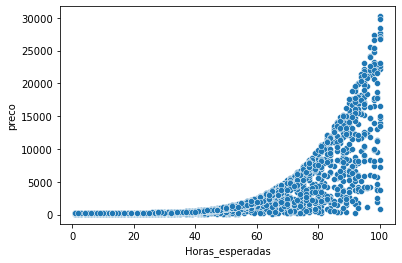

In [6]:
import seaborn as sns

sns.scatterplot(x='Horas_esperadas', y='preco', data=dados)

<AxesSubplot:xlabel='Horas_esperadas', ylabel='preco'>

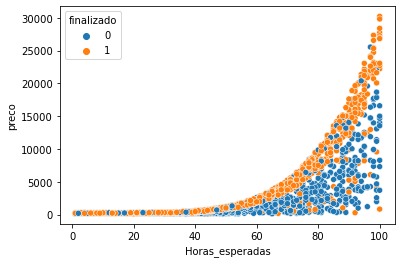

In [7]:
sns.scatterplot(x='Horas_esperadas', y='preco', data=dados, hue='finalizado')

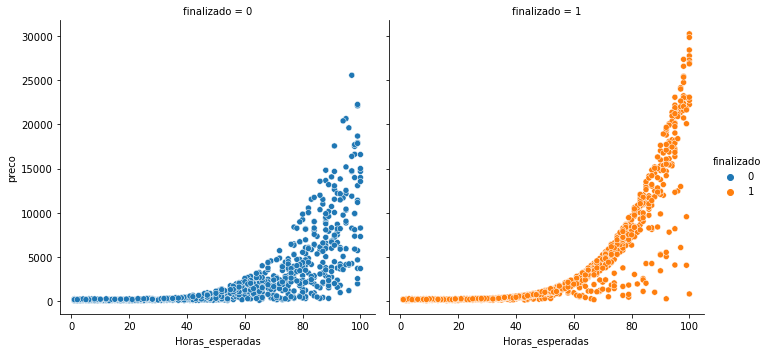

In [8]:
sns.relplot(x='Horas_esperadas', y='preco', data=dados, hue='finalizado', col='finalizado')

In [9]:
x = dados[['Horas_esperadas', 'preco']]
y = dados['finalizado']

In [10]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

SEED = 20

np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)


taxa_de_acerto = accuracy_score(teste_y, previsoes)
print(f"A acurácia foi de {taxa_de_acerto*100}%")

print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")
treino_x

A acurácia foi de 51.48148148148148%
Treinaremos com 1617 elementos e testaremos com 540 elementos


C:\Users\Bruno\Anaconda3\envs\ambiente\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Horas_esperadas,preco
970,79,533
657,16,184
409,45,517
1208,44,702
358,70,1523
...,...,...
381,83,4184
1125,24,297
1747,77,6031
959,37,256


In [11]:
treino_x

,Horas_esperadas,preco
970,79,533
657,16,184
409,45,517
1208,44,702
358,70,1523
...,...,...
381,83,4184
1125,24,297
1747,77,6031
959,37,256


In [12]:
import numpy as np

previsoes_de_base = np.ones(540)

In [13]:
treino_x

,Horas_esperadas,preco
970,79,533
657,16,184
409,45,517
1208,44,702
358,70,1523
...,...,...
381,83,4184
1125,24,297
1747,77,6031
959,37,256


In [14]:

taxa_de_acerto = accuracy_score(teste_y, previsoes_de_base)
print(f"A acurácia do algoritmo de baseline foi de {taxa_de_acerto*100}%")

print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

A acurácia do algoritmo de baseline foi de 52.59259259259259%
Treinaremos com 1617 elementos e testaremos com 540 elementos


<AxesSubplot:xlabel='Horas_esperadas', ylabel='preco'>

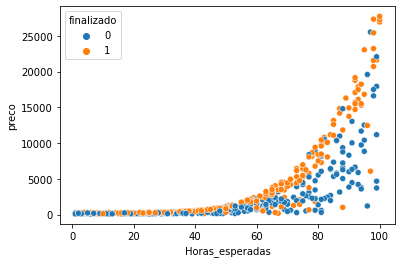

In [15]:
sns.scatterplot(x='Horas_esperadas', y='preco', data=teste_x, hue=teste_y)

In [16]:
teste_x

,Horas_esperadas,preco
499,88,6588
1149,49,1017
870,39,264
1617,37,399
1896,57,1643
...,...,...
151,62,528
1357,50,837
295,75,2924
1239,23,236


In [17]:
teste_y

499     0
1149    1
870     1
1617    0
1896    1
       ..
151     1
1357    1
295     0
1239    1
626     1
Name: finalizado, Length: 540, dtype: int64

In [18]:
x_min = teste_x.Horas_esperadas.min()
x_max = teste_x.Horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)



1 100 101 27738


In [19]:
pixel = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixel)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixel)

In [20]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [21]:
np.arange(x_min, x_max, (x_max-x_min)/pixel)

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [22]:
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [23]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

C:\Users\Bruno\Anaconda3\envs\ambiente\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [24]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

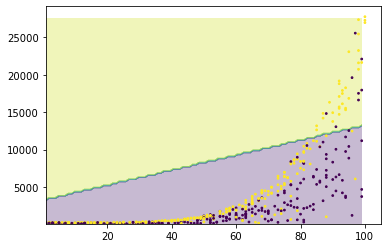

In [25]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(teste_x.Horas_esperadas, teste_x.preco, c=teste_y,s=3)

In [29]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

SEED = 5

np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)

modelo = SVC(gamma = 'auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
print(f"A acurácia foi de {taxa_de_acerto*100}%")

print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

A acurácia foi de 59.074074074074076%
Treinaremos com 1617 elementos e testaremos com 540 elementos


C:\Users\Bruno\Anaconda3\envs\ambiente\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


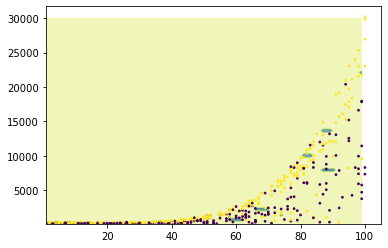

In [30]:
x_min = teste_x.Horas_esperadas.min()
x_max = teste_x.Horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixel = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixel)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixel)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(teste_x.Horas_esperadas, teste_x.preco, c=teste_y,s=3)

In [51]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

SEED = 5

np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)

"""
O StandartScaler() vai tirar a média, ou seja deslocar todo mundo pela média, 
e depois dividir pelo desvio padrão.
"""
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
print(f"A acurácia foi de {taxa_de_acerto*100}%")

print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

data_x = teste_x[:,0]
data_y = teste_x[:,1]


A acurácia foi de 66.85185185185185%
Treinaremos com 1617 elementos e testaremos com 540 elementos


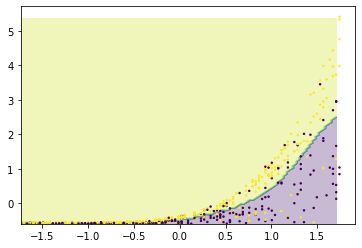

In [49]:
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)

plt.scatter(data_x, data_y, c=teste_y, s=2)